In [5]:
from pydot import *

Хочется поговорить немного про типизацию, утиную и разную.

Поговорим в контексте простой задачи - DFS обхода.

Если задача кажется совсем скучной - [попробуйте реализовать backpropagation](https://colab.research.google.com/drive/1Qe11uLSUmpQNAM8cjQ8rTKVj-jN5AQH7).

In [6]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    for vert in graph[start]:
        if vert not in visited:
            dfs(graph, vert, visited)
    return visited

dfs(graph, 'C')

{'A', 'B', 'C', 'D', 'E', 'F'}

Что, если хочется добавить какой-то полезный функционал в данный обход?

Для добавления этого функционала можно добавить колбэки на нужные события. Ограничимся пока входом в вершину (перекраска в серый цвет) и выходом из неё (перекраска в черный).

Какой функционал будем добавлять? Например, мне хочется визуализировать ход dfs.

Ну, саму визуализацию написать довольно просто: 

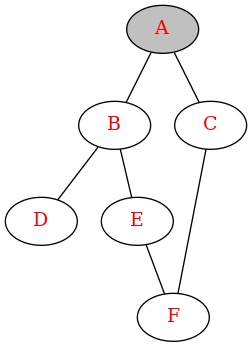

In [7]:
from IPython import display

def display_graph(pdot):
    display.clear_output(True)
    plt = display.Image(pdot.create_png())
    display.display(plt)


dot_graph = Dot(graph_type='graph')

for node in graph:
    dot_graph.add_node(Node(node, style='filled', fontcolor='red', fillcolor='white'))
  
for node_from in graph:
    for node_to in graph[node_from]:
        if not dot_graph.get_edge(node_from, node_to):
            dot_graph.add_edge(Edge(node_from, node_to))

dot_graph.get_node('A')[0].set_fillcolor('gray')

display_graph(dot_graph)

Напишите класс `VisualizationCallback`, который будет демонстрировать на каждом шаге dfs, как перекрашиваются вершины.

Сделаем ему такой интерфейс:

In [9]:
import time

class VisualizationCallback:
    
    
    
    def __init__(self, graph):
        
        self.dot_graph = Dot(graph_type='graph')
        
        for node in graph:
          self.dot_graph.add_node(Node(node, style='filled', fontcolor='red', fillcolor='white'))
        
        for node_from in graph:
          for node_to in graph[node_from]:
              if not self.dot_graph.get_edge(node_from, node_to):
                  self.dot_graph.add_edge(Edge(node_from, node_to))

        display_graph(self.dot_graph)
        time.sleep(1)
  
    def discover_vertex(self, vertex):
        
        self.dot_graph.get_node(vertex)[0].set_fillcolor('gray')
        
        display_graph(self.dot_graph)
        time.sleep(1)
        
    def finish_vertex(self, vertex):
        
        self.dot_graph.get_node(vertex)[0].set_fillcolor('black')
      
        display_graph(self.dot_graph)
        time.sleep(1)

Заиспользуем его в `dfs`:

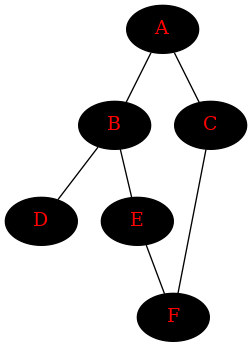

{'A', 'B', 'C', 'D', 'E', 'F'}

In [10]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

def dfs(graph, start, callback, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    callback.discover_vertex(start)
    for vert in graph[start]:
        if vert not in visited:
            dfs(graph, vert, callback, visited)
    callback.finish_vertex(start)
    return visited
  
callback = VisualizationCallback(graph)
dfs(graph, 'C', callback)

При чём здесь типизация?

Функция `dfs` пользуется неявным интерфейсом для `callback`: тем, что в нём есть методы `discover_vertex` и `finish_vertex`. Таким образом, нам помогает утиная типизация python. 

Но динамическая типизация в нем может привести к неприятному: что, если мы передадим колбэк без метода `finish_vertex`. Алгоритм может обработать тысячу вершин, прежде чем узнает, что такого метода нет.

А как то же самое можно сделать в языке с сильной типизацией?

Посмотрим на С++ и Go.

Начнём с C++.

За Go - идём [сюда](https://ideone.com/FxMRWF).